<a href="https://colab.research.google.com/github/washingtontenorio/ferramentas-de-gerenciamento-e-implatacao/blob/main/03_visualizacao_de_dados_2025_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

# Análise exploratória de dados (*exploratory data analysis*, EDA)

 - Explorar os dados para identificar padrões de interesse
 - Trabalho de detetive, que busca pistas e evidênica a serem confirmadas numa análise inferencial (Tukey 1977)
 - Não é análise de significância estatística.
 - Se utiliza de estatística descritiva e visualização de dados.

 ---

In [ ]:
# @title carregar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("whitegrid")

In [ ]:
# @title Leitura do conjunto de dados
df = pd.read_csv(
    'https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/tips.csv'
)
df.head()

In [ ]:
# Criação do dicionário de dados
df_dict = pd.DataFrame([
    {
        "variavel": "total_bill",
        "descricao": "Total pago da conta em dólares.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "tip",
        "descricao": "Valor da gorjeta dada ao garçom em dólares.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "sex",
        "descricao": "Gênero do cliente (Male/Female).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "smoker",
        "descricao": "Indica se o cliente é fumante (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "binária",
    },
    {
        "variavel": "day",
        "descricao": "Dia da semana da refeição (Thur, Fri, Sat, Sun).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "time",
        "descricao": "Período do dia em que ocorreu a refeição (Lunch/Dinner).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "size",
        "descricao": "Número de pessoas na mesa.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    }
])

# Introdução a visualização de dados


## Estatística descritiva é o suficiente?

In [ ]:
# o quarteto anscombe
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
# algumas estatísticas
display(anscombe.groupby("dataset").agg(["mean", "std"]))
display(anscombe.groupby("dataset")[["x", "y"]].apply(lambda group: group["x"].corr(group["y"])))

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

,0
dataset,
I,0.816421
II,0.816237
III,0.816287
IV,0.816521


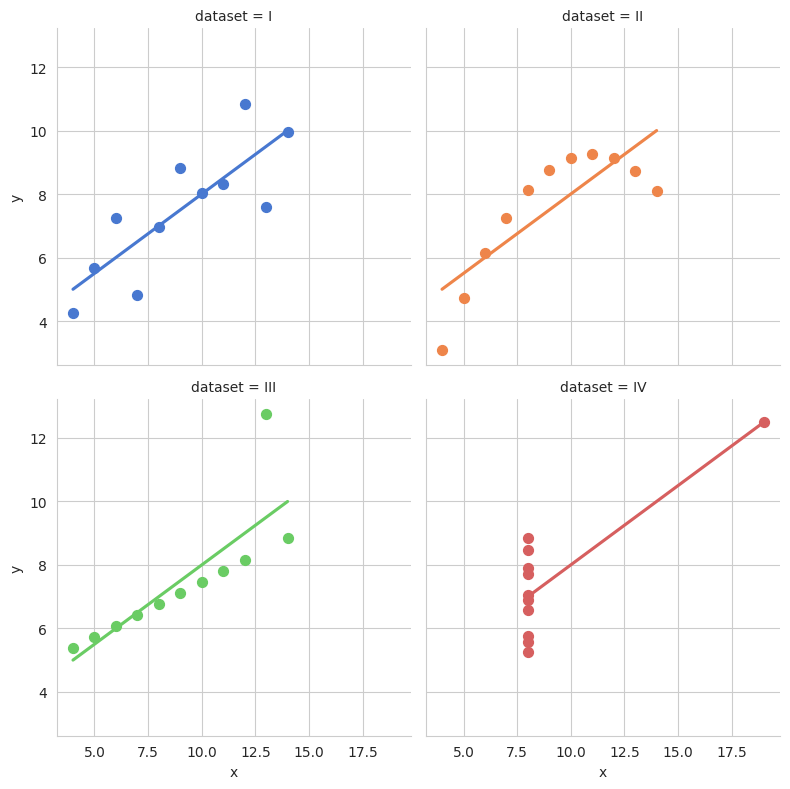

In [ ]:
sns.lmplot(
    data=anscombe, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)
plt.show()

---
## O bom, o ruim, o feio e o errado

![](https://clauswilke.com/dataviz/introduction_files/figure-html/ugly-bad-wrong-examples-1.png)

 - **Ruim**: versão enganosa do gráfico bom; Escalas diferentes dão uma impressão errada da informação.
 - **Errado**: Versão incorreta do gráfico bom; Não há forma de verificar os valores e intervalos.
 - **Feio**: tecnicamente correto; Não é esteticamente agradável e tem muita informação sem necessidade.
---

## Qual gráfico escolher?

![](https://vdsbook.com/Figures-External/eda/data_viz_simplified.png)

---

## Anatomia de uma figura (`matplotlib` e `seaborn`)

<div align=center>
<img src="https://www.scaler.com/topics/images/matplotlib-plots-anatomy.webp" align="center"/>
</div>

<div align=center>
<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png" align="center"/>
</div>

## Gráficos usando o seaborn
<div align=center>
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" align="center"/>
</div>



## Quantidades
 - Gráfico de barras: agrupadas, ~empilhadas~,
 - Gráficos de pontos
 - Heatmap

In [ ]:
filmes = pd.DataFrame([
    {"titulo": "A escolha perfeita 3", "lucro": 19928525},
    {"titulo": "Jumanji", "lucro": 36169328},
    {"titulo": "O touro ferdinando", "lucro": 7316746},
    {"titulo": "O rei do show", "lucro": 8805843},
    {"titulo": "Star Wars", "lucro": 71565498},
])
filmes.head()

,titulo,lucro
0,A escolha perfeita 3,19928525
1,Jumanji,36169328
2,O touro ferdinando,7316746
3,O rei do show,8805843
4,Star Wars,71565498


In [ ]:
# gráfico simples, padrão
sns.barplot(data=filmes, x='titulo', y='lucro')

In [ ]:
# gráfico melhorado


plt.show()

In [ ]:
# plotar gráfico de pontos (tarefa de casa)


In [ ]:
# plotar mapa de calor (tarefa de casa)


## Distribuições: `sns.countplot()`, `sns.histplot()`, `sns.boxplot()`
 - Histogramas
 - Densidade
 - Diagramas de caixa: boxplot, violinplot, strip

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Distribuição das variáveis qualitativas

# selecionar variáveis (qualitativas)
# criar figura (subplots)
# plotar gráficos de histograma (um por um)

In [ ]:
# Distribuição das variáveis qualitativas (histograma + boxplot)

# selecionar variáveis (quantitativa)
# criar figura (subplots)
# plotar gráficos de histograma (um por um)

## Associações `sns.relplot()`, `sns.jointplot()`, `sns.pairplot()`, `sns.regplot()`
 - Gráficos de dispersão
 - Gráficos de linha
 - Correlação (`heatmap`)

In [ ]:
# associação entre duas variáveis (total_bill vs tip)


In [ ]:
# associação dois a dois (pairplot)

In [ ]:
# uso de diferentes canais (codificação de informação - cor, tamanho, etc.)

### Proporções
 - ~Pizza~: únicos e multiplos
 - Barras: agrupadas, ~empilhadas~
 - Densidade empilhada

In [ ]:
# gráfico de barras agrupadas

In [ ]:
# heatmap

# Links importantes
 - [The Python Graph Gallery](https://python-graph-gallery.com/)
 - [Visualizing nested proportions](https://clauswilke.com/dataviz/nested-proportions.html)
 - [Galery - seaborn](https://seaborn.pydata.org/examples/index.html)
 - [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)
 - [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
 - [Seaborn Color Palettes and How to Use Them](https://r02b.github.io/seaborn_palettes/)